# Multiple linear Regression(Using Library function)

Coefficients: [ 1.78081362 -1.33924232]
Intercept: -2.557174883004486


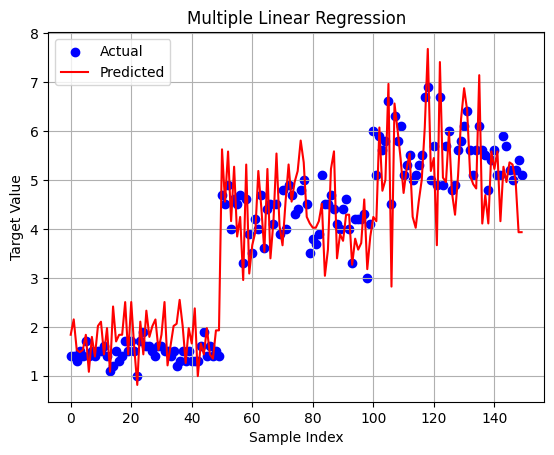

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

x = df[["SepalLengthCm","SepalWidthCm"]]  # Independent variable
y = df["PetalLengthCm"]          # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Print model parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Optional: Plot actual vs predicted
plt.scatter(range(len(y)), y, color='blue', label='Actual')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Multiple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# multiple linear regression (without library function)

Intercept (β₀): -2.557174883004432
Coefficient β₁ (for X₁): 1.7808136229675477
Coefficient β₂ (for X₂): -1.3392423228124664
Mean Squared Error (MSE): 0.4113763319482182
Mean Absolute Error (MAE): 0.51942741747027
Root Mean Squared Error (RMSE): 0.6413862579976424


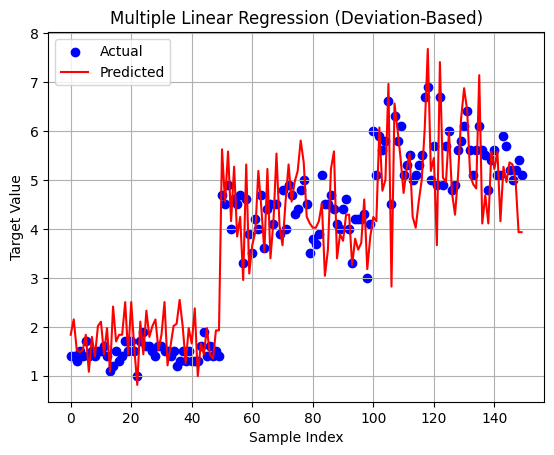

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

X1 = df["SepalLengthCm"]
X2 = df["SepalWidthCm"]
Y = df["PetalLengthCm"]
n = len(Y)

# Step 1: Compute required summations
sum_X1 = np.sum(X1)
sum_X2 = np.sum(X2)
sum_Y = np.sum(Y)

sum_X1_squared = np.sum(X1 ** 2)
sum_X2_squared = np.sum(X2 ** 2)
sum_X1X2 = np.sum(X1 * X2)
sum_X1Y = np.sum(X1 * Y)
sum_X2Y = np.sum(X2 * Y)

# Step 2: Compute deviation-based terms
S_x1_squared = sum_X1_squared - (sum_X1 ** 2) / n
S_x2_squared = sum_X2_squared - (sum_X2 ** 2) / n
S_x1x2 = sum_X1X2 - (sum_X1 * sum_X2) / n
S_x1y = sum_X1Y - (sum_X1 * sum_Y) / n
S_x2y = sum_X2Y - (sum_X2 * sum_Y) / n

# Step 3: Compute coefficients using your formulas
denominator = (S_x1_squared * S_x2_squared) - (S_x1x2 ** 2)

beta_1 = ((S_x2_squared * S_x1y) - (S_x1x2 * S_x2y)) / denominator
beta_2 = ((S_x1_squared * S_x2y) - (S_x1x2 * S_x1y)) / denominator

# Step 4: Compute intercept
X1_mean = np.mean(X1)
X2_mean = np.mean(X2)
Y_mean = np.mean(Y)

beta_0 = Y_mean - beta_1 * X1_mean - beta_2 * X2_mean

print("Intercept (β₀):", beta_0)
print("Coefficient β₁ (for X₁):", beta_1)
print("Coefficient β₂ (for X₂):", beta_2)

# Step 5: Predict values
Y_pred = beta_0 + beta_1 * X1 + beta_2 * X2

# Step 6: Error metrics
mse = np.mean((Y - Y_pred) ** 2)
mae = np.mean(np.abs(Y - Y_pred))
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 7: Plot actual vs predicted
plt.scatter(range(n), Y, color='blue', label='Actual')
plt.plot(range(n), Y_pred, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Multiple Linear Regression (Deviation-Based)')
plt.legend()
plt.grid(True)
plt.show()

# multiple linear regression ( matrix method)

Intercept: -2.557174883004108
Coefficients: [ 1.78081362 -1.33924232]
Mean Squared Error (MSE): 0.4113763319482181
Mean Absolute Error (MAE): 0.519427417470266
Root Mean Squared Error (RMSE): 0.6413862579976423


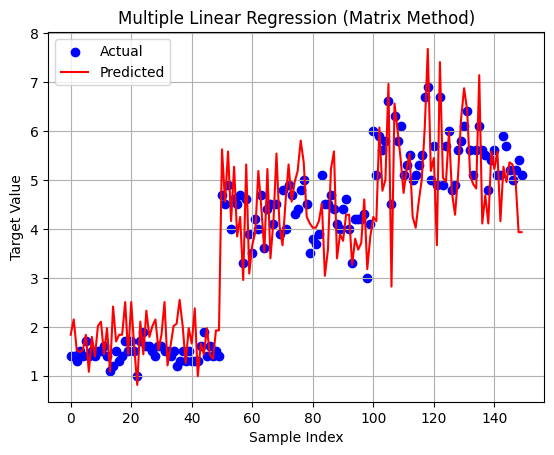

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

# Independent variables
X1 = df["SepalLengthCm"].values
X2 = df["SepalWidthCm"].values

# Dependent variable
y = df["PetalLengthCm"].values


# Step 1: Create X matrix (WITHOUT intercept)
X = np.column_stack((X1, X2))   # shape: (n, 2)

# Step 1: Add intercept term (column of ones)
X_design = np.hstack((np.ones((X.shape[0], 1)), X))  # Shape: (n_samples, n_features + 1)

# Step 2: Compute coefficients using Normal Equation: θ = (XᵀX)⁻¹Xᵀy
theta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

# Extract intercept and coefficients
intercept = theta[0]
coefficients = theta[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Step 3: Predict values
y_pred = X_design @ theta

# Step 4: Calculate error metrics manually
mse = np.mean((y - y_pred) ** 2)
mae = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 5: Plot actual vs predicted
plt.scatter(range(len(y)), y, color='blue', label='Actual')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Multiple Linear Regression (Matrix Method)')
plt.legend()
plt.grid(True)
plt.show()